### Plotting normal dendrogram

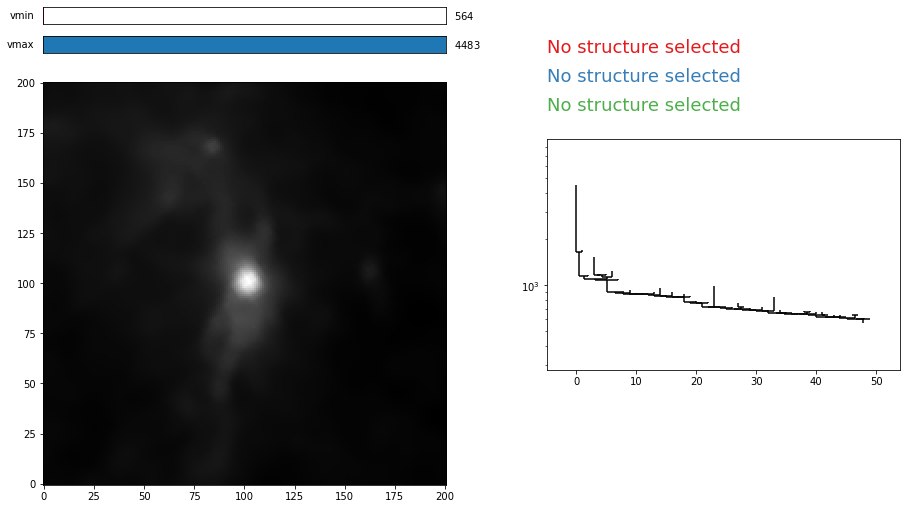

In [6]:
from astrodendro import Dendrogram
import numpy as np
import random
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs



image,header = fits.getdata('../fits_files/wave_350.fits', header = True)

d = Dendrogram.compute(image,min_value=200.0,min_delta = 0.7,min_npix=8, verbose=False)

v = d.viewer()
v.show()

In [2]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  201                                                  
NAXIS2  =                  201                                                  
EXTEND  =                    T                                                  
XTENSION= 'IMAGE   '                                                            
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
LONGSTRN= 'OGIP 1.0'                                                            
EXTNAME = 'image   '                                                            
CLASS___= 'herschel.ia.dataset.ArrayDataset'                                    
INFO____= 'Image   '        

In [5]:
print('npix = ',25/(0.000888888888888888*3600))

npix =  7.812500000000008


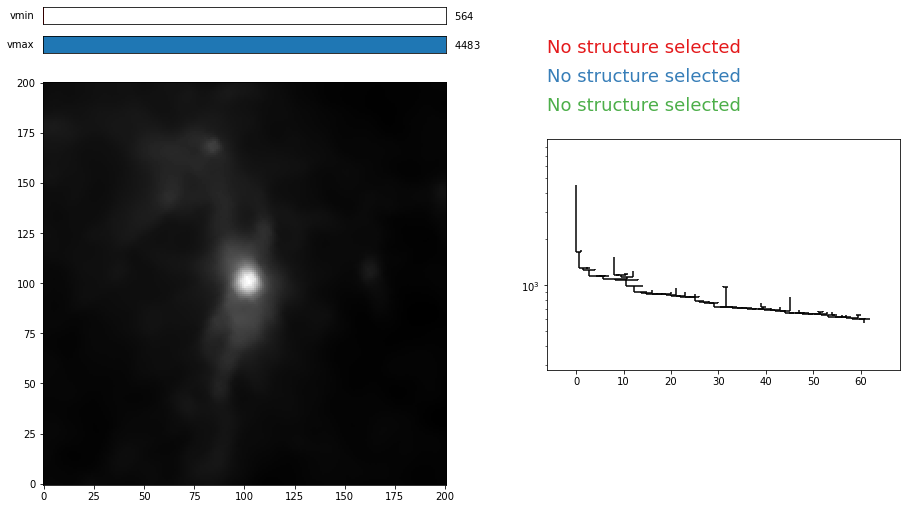

In [5]:
d = Dendrogram.compute(image,min_value=50.0,min_delta = 0.7,min_npix=2, verbose=False)

v = d.viewer()
v.show()

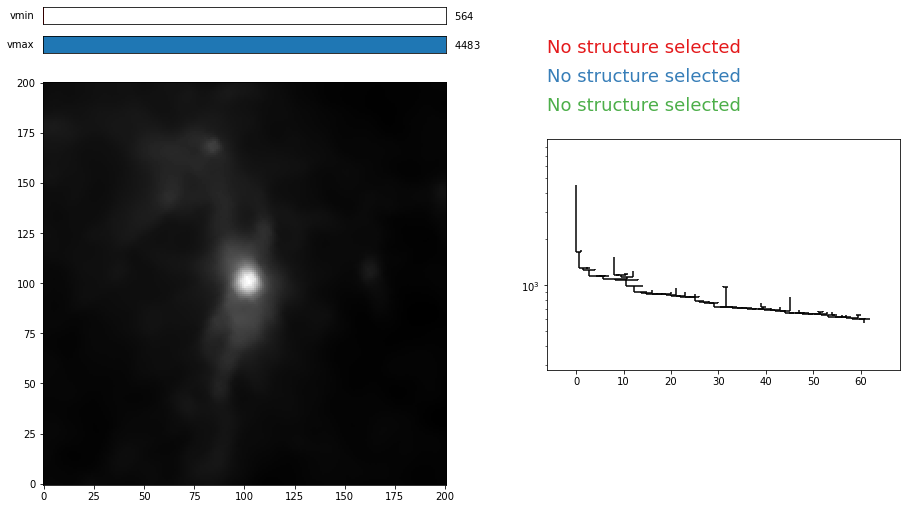

In [6]:
d = Dendrogram.compute(image,min_value=5.0,min_delta = 0.7,min_npix=2, verbose=False)

v = d.viewer()
v.show()

### Statistical parameters of filaments

STATISTICS RELATED TO THE LEAVES:
Analysing: <Structure type=branch idx=0>
major axis: 3.3348788202675026 pix
minor axix: 1.4816936321594465 pix
position angle: 98.9590998865729 deg
Generating dendrogram using 434 of 423,200 pixels (0.10255198487712665% of data)

[=========>                               ] 23%
[==================>                      ] 46%
[===========================>             ] 69%
[====================================>    ] 92%
[========================================>] 100%

/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/analysis.py:254: MissingMetadataWarning: vaxis (Index of velocity axis (numpy convention)) missing, defaulting to 0
  warnings.warn("{0} ({1}) missing, defaulting to {2}".format(self.key, self.description, self.default),


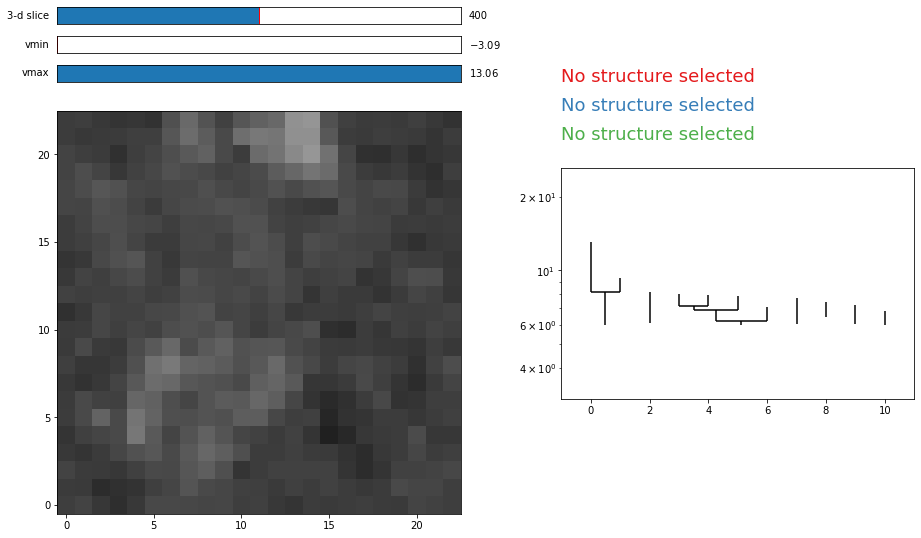

major axis: 10.004636460802509 arcsec
minor axix: 4.4450808964783395 arcsec
position angle: 98.9590998865729 deg
flux: 1714.9415442126074 Jy
THE CATALOGUE:
Computing catalog for 15 structures

[==>                                      ] 6%
[=====>                                   ] 13%
[========>                                ] 20%
[==========>                              ] 26%
[=============>                           ] 33%
[================>                        ] 40%
[==================>                      ] 46%
[=====================>                   ] 53%
[=======================>                 ] 59%
[==========================>              ] 66%
[=============================>           ] 73%
[================================>        ] 80%
[==================================>      ] 86%
[=====================================>   ] 93%
[========================================>] 100%
[========================================>] 100%

/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/flux.py:144: UnitMetadataWarning: 'Kelvin' units interpreted as main beam brightness temperature.
  warnings.warn("'Kelvin' units interpreted as main beam brightness temperature.",
/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/analysis.py:254: MissingMetadataWarning: vaxis (Index of velocity axis (numpy convention)) missing, defaulting to 0
  warnings.warn("{0} ({1}) missing, defaulting to {2}".format(self.key, self.description, self.default),
/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/flux.py:144: UnitMetadataWarning: 'Kelvin' units interpreted as main beam brightness temperature.
  warnings.warn("'Kelvin' units interpreted as main beam brightness temperature.",
/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.de


_idx    area_ellipse    area_exact ...       x_cen               y_cen       
          arcsec2        arcsec2   ...                                       
---- ------------------ ---------- ... ------------------ -------------------
   0 193.67738694522293      648.0 ... 270.20390282942606 -23.352388146941774
   1 14.136287669296108       54.0 ...  270.1995752685617 -23.356909766873606
 ...                ...        ... ...                ...                 ...
  12                0.0       18.0 ... 270.22079283216306 -23.350255984472525
  13                0.0       18.0 ...  270.2148812843235 -23.347478206693104
  14   7.52305090936806       27.0 ...  270.2083619538967 -23.345583129109286
Length = 15 rows


In [2]:
# Trying to find filament stats

import random
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy import wcs
from astrodendro import Dendrogram




data,header = fits.getdata('../fits_files/wave_350.fits', header = True)

wcs = WCS(header)



#strcuure statistics

print('STATISTICS RELATED TO THE LEAVES:')
from astrodendro.analysis import PPVStatistic
print('Analysing:',d.trunk[0])
stat = PPVStatistic(d.trunk[0])
print('major axis:',stat.major_sigma)
print('minor axix:',stat.minor_sigma)
print('position angle:',stat.position_angle)

#with proper units
from astropy import units as u
metadata={}
metadata['data_unit'] = u.K
metadata['wcs'] = wcs
metadata['velocity_scale']=u.km/u.s
metadata['wavelength'] = 345.79598999e+9*u.Hz
metadata['spatial_scale'] = 3*u.arcsec
metadata['beam_major'] = 18*u.arcsec 
metadata['beam_minor']= 18*u.arcsec

d = Dendrogram.compute(data, min_value=6.0, min_delta=0.7, min_npix=2, verbose=True)
v = d.viewer()
v.show()

stat = PPVStatistic(d.trunk[0],metadata = metadata)

print('major axis:',stat.major_sigma)
print('minor axix:',stat.minor_sigma)
print('position angle:',stat.position_angle)
print('flux:',stat.flux)

print('THE CATALOGUE:')
#making a catalogue
from astrodendro import Dendrogram, ppv_catalog
cat = ppv_catalog(d, metadata)
cat.pprint(show_unit = True, max_lines =10)

cat.write('temp_3d_fil_stat.csv')  


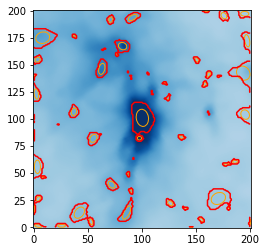

In [25]:
# overplotting of calculated statistical quantities and the original plots
from astropy.io import fits

from astrodendro import Dendrogram
from astrodendro.analysis import PPStatistic
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import LogNorm

hdu = fits.open('../fits_files/wave_350.fits')[0]


d = Dendrogram.compute(hdu.data, min_value=60.0, min_delta=0.7, min_npix=2)
p = d.plotter() # provides a non-interactive plotting tool to plot the dendogram.


fig = plt.figure() #adding figure plot
ax = fig.add_subplot(1, 1, 1) # defining a subplot no.1 of 1x1 gridding

# adding the fits data to our subplot figure, interpolation generally makes the
# image look better by preserving the resolution and in this context we can avoid
# this.



ax.imshow(hdu.data, origin = 'lower',cmap=plt.cm.Blues,vmin = 60,vmax = 1650) 


#plt.subplot(projection=WCS(hdu[0].header))
#ax.imshow(int_plot[0].data[0], origin = 'lower',cmap=plt.cm.Blues) 

for leaf in d.leaves: # d.leaves will make an array of all the leaves present in d

    p.plot_contour(ax, structure=leaf, colors='red') # to draw red contours indicating leaves

    s = PPStatistic(leaf)
    ellipse = s.to_mpl_ellipse(edgecolor='orange', facecolor='none') # using the statistics (major and minor axis) of the leaf ellipses of orange colour edge is made.

    ax.add_patch(ellipse) # ellipses are added or patched to the defined figure

#ax.set_xlim(0, 91) #xlimit
#ax.set_ylim(0, 91) # ylimnit
plt.show()




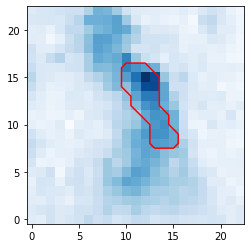

In [135]:
# overplotting of calculated statistical quantities and the original plots
from astropy.io import fits

from astrodendro import Dendrogram
from astrodendro.analysis import PPVStatistic

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import LogNorm

import numpy as np
from astropy.io import fits
from scipy.optimize import curve_fit as fit
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from reproject import reproject_interp
from matplotlib.colors import LogNorm
import os
from reproject import reproject_adaptive



hdu = fits.open('../fits_files/hf02072_only_12co_32_0p5kms.fits')[0]
int_plot = fits.open('../fits_files/hf02072_only_2d_12co_32_0p5kms.fits')

d = Dendrogram.compute(hdu.data, min_value=7.0, min_delta=1.3, min_npix=2)
p = d.plotter() # provides a non-interactive plotting tool to plot the dendogram.


fig = plt.figure() #adding figure plot
ax = fig.add_subplot(1, 1, 1) # defining a subplot no.1 of 1x1 gridding

# adding the fits data to our subplot figure, interpolation generally makes the
# image look better by preserving the resolution and in this context we can avoid
# this.



#ax = plt.subplot(projection=wcs, slices=('x', 'y', 0))
ax.imshow(hdu.data[394], origin = 'lower',cmap=plt.cm.Blues) 


for leaf in d.leaves: # d.leaves will make an array of all the leaves present in d

    p.plot_contour(ax, structure=leaf, colors='red') # to draw red contours indicating leaves

    s = PPVStatistic(leaf)
    #ellipse = s.to_mpl_ellipse(edgecolor='orange', facecolor='none') # using the statistics (major and minor axis) of the leaf ellipses of orange colour edge is made.

    #ax.add_patch(ellipse) # ellipses are added or patched to the defined figure

#ax.set_xlim(0, 91) #xlimit
#ax.set_ylim(0, 91) # ylimnit
plt.show()





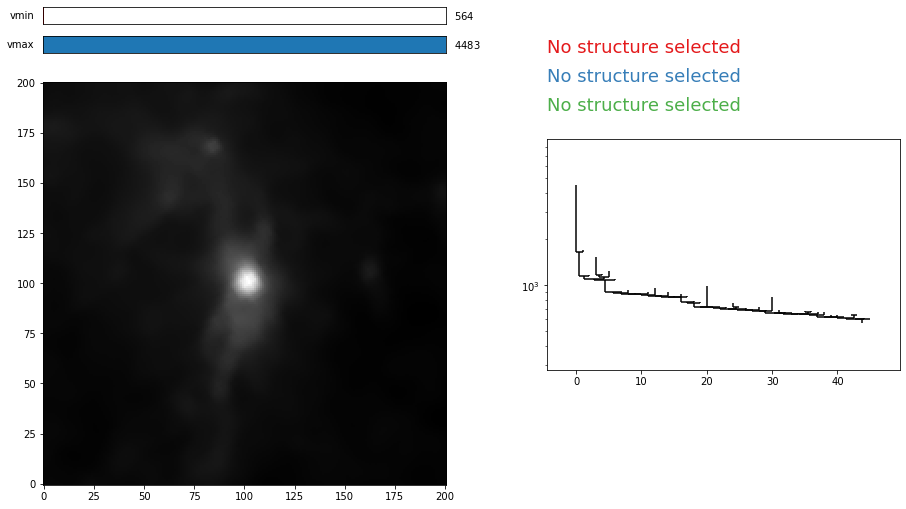

major axis: 563.9599086033279 arcsec
minor axix: 538.0393302236436 arcsec
position angle: 114.5803644536688 deg
flux: 4556222.229315345 Jy
THE CATALOGUE:
Computing catalog for 91 structures



[>                                        ] 1%


[>                                        ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 7%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 12%
[=====>                                   ] 13%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 17%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 21%
[=========>                               ] 23%
[=========>                               ] 24%

In [11]:
# Trying to find filament stats

import random
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy import wcs
from astrodendro import Dendrogram,pp_catalog
from astrodendro.analysis import PPStatistic




data,header = fits.getdata('../fits_files/wave_350.fits', header = True)

wcs = WCS(header)




#with proper units
from astropy import units as u
metadata={}
metadata['data_unit'] = u.Jy /u.beam
metadata['wcs'] = wcs
#metadata['velocity_scale']=u.m/u.s
#metadata['wavelength'] = 345.79598999e+9*u.Hz
metadata['spatial_scale'] = 10*u.arcsec
metadata['beam_major'] = 25*u.arcsec 
metadata['beam_minor']= 25*u.arcsec

d = Dendrogram.compute(data, min_value=60.0, min_delta=0.7, min_npix=10, verbose=False)
v = d.viewer()
v.show()

stat = PPStatistic(d.trunk[0],metadata = metadata)

print('major axis:',stat.major_sigma)
print('minor axix:',stat.minor_sigma)
print('position angle:',stat.position_angle)
print('flux:',stat.flux)

print('THE CATALOGUE:')
#making a catalogue
from astrodendro import Dendrogram, ppv_catalog
cat = pp_catalog(d, metadata)
cat.pprint(show_unit = True, max_lines =10)

cat.write('../tables/min_v_60_min_del_0p7_min_pix_10_continuum_fil_stat.csv')  


Generating dendrogram using 19 of 423,200 pixels (0.0044896030245746696% of data)

[========================================>] 100%


/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/viewer.py:176: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  self.ax_dendrogram.set_xlim(xmin - dx * 0.1, xmax + dx * 0.1)


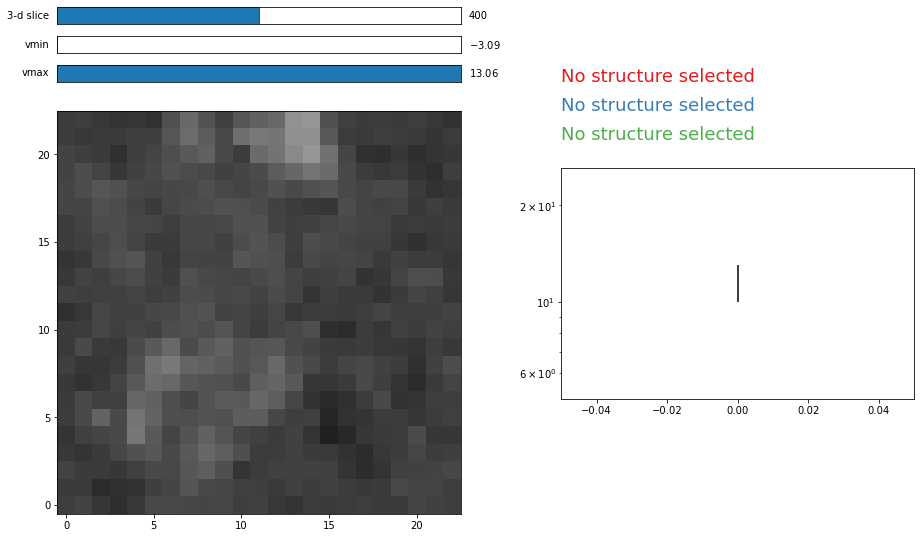

/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/analysis.py:254: MissingMetadataWarning: vaxis (Index of velocity axis (numpy convention)) missing, defaulting to 0
  warnings.warn("{0} ({1}) missing, defaulting to {2}".format(self.key, self.description, self.default),


major axis: 6.77324048828532 arcsec
minor axix: 4.577268138653222 arcsec
position angle: 158.39643633168495 deg


/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/flux.py:144: UnitMetadataWarning: 'Kelvin' units interpreted as main beam brightness temperature.
  warnings.warn("'Kelvin' units interpreted as main beam brightness temperature.",


flux: 1836.9307803785407 Jy
THE CATALOGUE:
Computing catalog for 1 structures


/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/analysis.py:254: MissingMetadataWarning: vaxis (Index of velocity axis (numpy convention)) missing, defaulting to 0
  warnings.warn("{0} ({1}) missing, defaulting to {2}".format(self.key, self.description, self.default),
/Users/greyyard/opt/anaconda3/lib/python3.8/site-packages/astrodendro-0.2.1.dev36+g75ec031-py3.8.egg/astrodendro/flux.py:144: UnitMetadataWarning: 'Kelvin' units interpreted as main beam brightness temperature.
  warnings.warn("'Kelvin' units interpreted as main beam brightness temperature.",



[========================================>] 100%
[========================================>] 100%
_idx    area_ellipse    area_exact ...       x_cen               y_cen       
          arcsec2        arcsec2   ...                                       
---- ------------------ ---------- ... ------------------ -------------------
   0 135.02083386672172      500.0 ... 270.20372847243357 -23.343084207811675


In [128]:
# Trying to find filament stats

import random
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy import wcs
from astrodendro import Dendrogram




data,header = fits.getdata('../fits_files/hf02072_only_12co_32_0p5kms.fits', header = True)

wcs = WCS(header)




#with proper units
from astropy import units as u
metadata={}
metadata['data_unit'] = u.K
metadata['wcs'] = wcs
metadata['velocity_scale']=u.m/u.s
metadata['wavelength'] = 345.79598999e+9*u.Hz
metadata['spatial_scale'] = 10*u.arcsec
metadata['beam_major'] = 15*u.arcsec 
metadata['beam_minor']= 15*u.arcsec

d = Dendrogram.compute(data, min_value=10.0, min_delta=1.3, min_npix=2, verbose=True)
v = d.viewer()
v.show()

stat = PPVStatistic(d.trunk[0],metadata = metadata)

print('major axis:',stat.major_sigma)
print('minor axix:',stat.minor_sigma)
print('position angle:',stat.position_angle)
print('flux:',stat.flux)

print('THE CATALOGUE:')
#making a catalogue
from astrodendro import Dendrogram, ppv_catalog
cat = ppv_catalog(d, metadata)
cat.pprint(show_unit = True, max_lines =10)

cat.write('min_v_10_min_del_1p3_temp_3d_fil_stat.csv')  



In [96]:
hdu.header

SIMPLE  =                    T         /                                        
BITPIX  =                  -32         /                                        
NAXIS   =                    3         /                                        
NAXIS1  =                   23         /                                        
NAXIS2  =                   23         /                                        
NAXIS3  =                  800         /                                        
DATAMIN = -0.3085914850235E+01         /                                        
DATAMAX =  0.1306448650360E+02         /                                        
BUNIT   = 'K (Ta*)     '               /                                        
CTYPE1  = 'RA---GLS    '               /                                        
CRVAL1  =  0.2702080416667E+03         /                                        
CDELT1  = -0.2777777779420E-02         /                                        
CRPIX1  =  0.1174401508218E+

In [127]:
0.2777777779420E-02  *3600

10.000000005912

In [3]:
345795.989900000 # rest frequency of the system in (MHz)

345795.9899

In [2]:
345795.989900000 / 1000

345.7959899

In [4]:
a = 1.67e+14
b = 345.7959899
c = 0.1098

factor = a/(b*c**2)
'{:e}'.format(factor)

'4.005824e+13'

In [6]:
4.005824*0.38

1.52221312